# Deep learning with Python

# 03. Getting started with neural networks

# 3.4 classifying movie reviews : IMDB 데이터셋

영화 리뷰의 긍정, 부정 예측

## 데이터 불러오기

In [1]:
import keras

keras.__version__

'2.4.3'

In [2]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

num_words = 10000 : 빈도수가 높은 10000개의 단어만 사용, 드물게 나타나는 단어는 무시

In [4]:
print("train data 0번째 데이터의 앞 10개 단어 : {}".format(train_data[0][:10]))

train_data_len = [len(element) for element in train_data[:10]]

print("train data 0 ~ 9번째 데이터의 길이 : {}".format(train_data_len))

print("train labels 0 ~ 19번째 데이터 : {}".format(train_labels[:20]))

train data 0번째 데이터의 앞 10개 단어 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
train data 0 ~ 9번째 데이터의 길이 : [218, 189, 141, 550, 147, 43, 123, 562, 233, 130]
train labels 0 ~ 19번째 데이터 : [1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


## 인덱스를 다시 단어로 변환  

In [5]:
word_index = imdb.get_word_index()

list(word_index.items())[:10]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [6]:
# (단어, 숫자) 구조를 (숫자, 단어) 형태로 변환

reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 0 : 패딩, 1 : 문서 시작, 2 : 사전에 없음 (unknown token)을 위한 index
decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

# dictionary.get(key, key값이 없을때 출력할 값) : key값에 해당하는 value를 반환

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 학습 데이터 준비

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    """
    원핫인코딩을 해주는 함수
    [1, 3, 5] => [0, 1, 0, 1, 0, 1] 식으로 변환
    """
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.

    return result

In [9]:
# 데이터셋 변환

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# x 데이터가 원핫인코딩 됐는지 shape로 확인

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 10000), (25000, 10000), (25000,), (25000,))

In [11]:
print(np.sum(x_train[0, :]))
print(len(train_data[0]))

# 중복되는 단어가 있어서 218개의 단어가 120개로 줄었나? : 정답!

120.0
218


In [12]:
# 결과 예시

x_train[0, :]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# numpy 없이 고유한 값 가져와서 갯수 세기

from collections import defaultdict

# 새로운 key를 입력받았는데 값이 없다면 기본값이 0인 딕셔너리 numpy 없이 고유한 값 가져와서 갯수 세기

count_dict = defaultdict(int)

for value in train_data[0]:
    count_dict[value] += 1

# key의 개수와 value의 합으로 제대로 작동했는지 확인
print(len(list(count_dict.keys())), sum(list(count_dict.values())))

count_dict

120 218


defaultdict(int,
            {1: 1,
             2: 6,
             4: 15,
             5: 9,
             6: 3,
             7: 2,
             8: 3,
             9: 1,
             12: 6,
             13: 3,
             14: 3,
             15: 4,
             16: 11,
             17: 3,
             18: 3,
             19: 2,
             21: 1,
             22: 6,
             25: 4,
             26: 3,
             28: 2,
             30: 1,
             32: 3,
             33: 2,
             35: 1,
             36: 4,
             38: 4,
             39: 1,
             43: 4,
             46: 1,
             48: 1,
             50: 2,
             51: 2,
             52: 1,
             56: 1,
             62: 1,
             65: 2,
             66: 2,
             71: 2,
             76: 1,
             77: 1,
             82: 1,
             87: 1,
             88: 2,
             92: 1,
             98: 1,
             100: 1,
             103: 1,
             104: 2,
      

## 신경망 모델 만들기

In [14]:
from keras import models
from keras import layers

# 모델 구조 만들기
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # output이 이진분류이기 때문에 마지막 layer의 activation은 sigmoid

# compile로 모델 학습 방법 결정
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

이런식으로 클래스를 호출해서 매개변수를 변경하여 사용할 수도 있음

=> 자신만의 최적화방법이나 손실함수, 성능측정지표를 개발하여 사용할 수 있다는 의미

```
from keras import optimizers
from keras import losses
from keras import metrics

mode.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])
```

## 훈련 검증

In [15]:
# 학습용 데이터와 validation 데이터를 분리
# 학습과정 내에서 validation을 평가하여 결과에 반영

partial_x_train = x_train[:-5000]
x_val = x_train[-5000:]

partial_y_train = y_train[:-5000]
y_val = y_train[-5000:]

In [16]:
# 모델 학습

tf.random.set_seed(20152410)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
40/40 [==============================] - 2s 47ms/step - loss: 0.5527 - accuracy: 0.7138 - val_loss: 0.3273 - val_accuracy: 0.8840
Epoch 2/20
40/40 [==============================] - 1s 36ms/step - loss: 0.2658 - accuracy: 0.9113 - val_loss: 0.2979 - val_accuracy: 0.8824
Epoch 3/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1956 - accuracy: 0.9305 - val_loss: 0.3295 - val_accuracy: 0.8730
Epoch 4/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1553 - accuracy: 0.9470 - val_loss: 0.2858 - val_accuracy: 0.8926
Epoch 5/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1217 - accuracy: 0.9610 - val_loss: 0.3212 - val_accuracy: 0.8804
Epoch 6/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1024 - accuracy: 0.9679 - val_loss: 0.3229 - val_accuracy: 0.8866
Epoch 7/20
40/40 [==============================] - 1s 34ms/step - loss: 0.0835 - accuracy: 0.9748 - val_loss: 0.3556 - val_accuracy: 0.8838
Epoch 8/20
40

model.fit() 메서드는 history 객체를 반환

history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리odel.fit() 메서드는 history 객체를 반환

In [17]:
# history.history의 keys 확인

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
import matplotlib
import matplotlib.pyplot as plt

In [19]:
# 비용함수, 정확도 불러오기

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(accuracy) + 1)

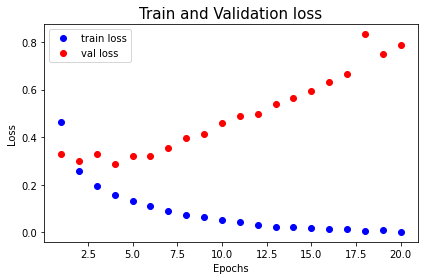

In [20]:
# train loss, validation loss 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, loss, 'bo', label = "train loss")
plt.plot(epochs, val_loss, 'ro', label = "val loss")

plt.title("Train and Validation loss", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

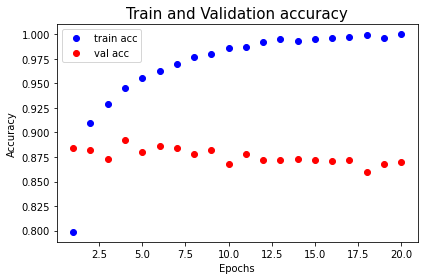

In [21]:
# train accuracy, validation accuracy 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, accuracy, 'bo', label = "train acc")
plt.plot(epochs, val_accuracy, 'ro', label = "val acc")

plt.title("Train and Validation accuracy", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

train이 적당히 학습되고, validation accuracy가 높은 epochs = 4로 최종 모델을 학습하도록 하겠습니다. 최종 모델에선 25000개 데이터 전부 사용합니다.

## 최종 모델 만들기

In [22]:
# 모델 구조 만들기
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# compile로 모델 학습 방법 결정
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [23]:
# 최종 모델 학습

tf.random.set_seed(20152410)

model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 512)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.5324 - binary_accuracy: 0.7397
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2542 - binary_accuracy: 0.9107
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1889 - binary_accuracy: 0.9318
Epoch 4/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1521 - binary_accuracy: 0.9469


In [24]:
# predict 메서드를 이용하여 예측값 생성

model.predict(x_test[:10])

array([[0.1664933 ],
       [0.9999447 ],
       [0.9256869 ],
       [0.8653803 ],
       [0.9662573 ],
       [0.89047   ],
       [0.99978614],
       [0.00813586],
       [0.9742776 ],
       [0.9969731 ]], dtype=float32)

In [25]:
# evaluate 메서드를 활용하여 test 데이터에 대한 성능 측정

result = model.evaluate(x_test, y_test)

print("Test loss : {}, Test accuracy : {}".format(result[0], result[1]))

782/782 [==============================] - 2s 2ms/step - loss: 0.3043 - binary_accuracy: 0.8812
Test loss : 0.3043091893196106, Test accuracy : 0.8812400102615356


최종 모델의 테스트 정확도는 약 88%

layer의 개수를 추가한다거나, layer의 node 수를 변경한다는 등 모델의 구조를 바꿔 성능을 높힐 수 있다!